In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [3]:
train = pd.read_csv('data/cs-training.csv', index_col = 0)
train

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
1,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
2,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
3,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
4,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
5,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
149996,0,0.040674,74,0,0.225131,2100.0,4,0,1,0,0.0
149997,0,0.299745,44,0,0.716562,5584.0,4,0,1,0,2.0
149998,0,0.246044,58,0,3870.000000,NaN,18,0,1,0,0.0
149999,0,0.000000,30,0,0.000000,5716.0,4,0,0,0,0.0


In [4]:
train.columns = ['more90_2yrs', 'rev_util', 'age', 'num_30-59_due', 'debt_ratio', 'month_income', 'num_cre_loan', 'num_90late', 'num_REL', 'num_60-89_due', 'num_dependents']
train

,more90_2yrs,rev_util,age,num_30-59_due,debt_ratio,month_income,num_cre_loan,num_90late,num_REL,num_60-89_due,num_dependents
1,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
2,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
3,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
4,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
5,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
149996,0,0.040674,74,0,0.225131,2100.0,4,0,1,0,0.0
149997,0,0.299745,44,0,0.716562,5584.0,4,0,1,0,2.0
149998,0,0.246044,58,0,3870.000000,NaN,18,0,1,0,0.0
149999,0,0.000000,30,0,0.000000,5716.0,4,0,0,0,0.0


In [5]:
train.head(10)

,more90_2yrs,rev_util,age,num_30-59_due,debt_ratio,month_income,num_cre_loan,num_90late,num_REL,num_60-89_due,num_dependents
1,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
2,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
3,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
4,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
5,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0
6,0,0.213179,74,0,0.375607,3500.0,3,0,1,0,1.0
7,0,0.305682,57,0,5710.000000,NaN,8,0,3,0,0.0
8,0,0.754464,39,0,0.209940,3500.0,8,0,0,0,0.0
9,0,0.116951,27,0,46.000000,NaN,2,0,0,0,NaN
10,0,0.189169,57,0,0.606291,23684.0,9,0,4,0,2.0


In [6]:
train.tail(10)

,more90_2yrs,rev_util,age,num_30-59_due,debt_ratio,month_income,num_cre_loan,num_90late,num_REL,num_60-89_due,num_dependents
149991,0,0.055518,46,0,0.609779,4335.0,7,0,1,0,2.0
149992,0,0.104112,59,0,0.477658,10316.0,10,0,2,0,0.0
149993,0,0.871976,50,0,4132.000000,NaN,11,0,1,0,3.0
149994,0,1.000000,22,0,0.000000,820.0,1,0,0,0,0.0
149995,0,0.385742,50,0,0.404293,3400.0,7,0,0,0,0.0
149996,0,0.040674,74,0,0.225131,2100.0,4,0,1,0,0.0
149997,0,0.299745,44,0,0.716562,5584.0,4,0,1,0,2.0
149998,0,0.246044,58,0,3870.000000,NaN,18,0,1,0,0.0
149999,0,0.000000,30,0,0.000000,5716.0,4,0,0,0,0.0
150000,0,0.850283,64,0,0.249908,8158.0,8,0,2,0,0.0


In [7]:
train.isna().sum()

more90_2yrs           0
rev_util              0
age                   0
num_30-59_due         0
debt_ratio            0
month_income      29731
num_cre_loan          0
num_90late            0
num_REL               0
num_60-89_due         0
num_dependents     3924
dtype: int64

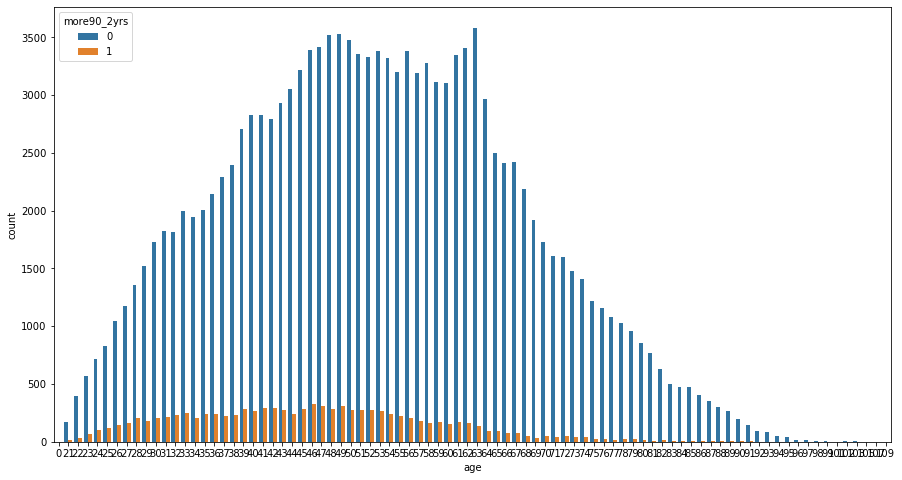

In [27]:
plt.figure(figsize=(15,8))
ax = sns.countplot(data = train, x = 'age', hue = 'more90_2yrs')

# age, rev_util

<Figure size 1440x1440 with 0 Axes>

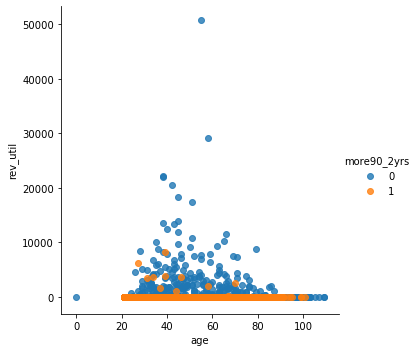

In [33]:
# rev_util(현재 운용 가능한 돈 비율) 낮을수록(2.5 이하) 연체 가능성 높음, 나이 20~70대
plt.figure(figsize=(20,20))
ax = sns.lmplot(data = train, x = 'age', y = 'rev_util', hue = 'more90_2yrs', fit_reg = False)

In [46]:
lower_rev_util = train[train['rev_util'] < 2.5]

<Figure size 1440x1440 with 0 Axes>

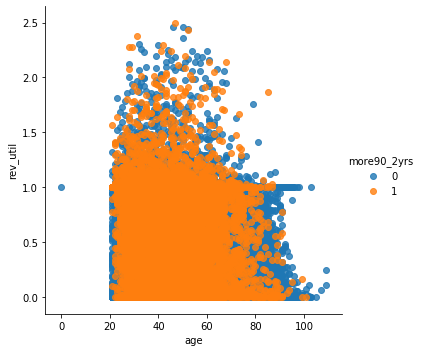

In [48]:
plt.figure(figsize=(20,20))
sns.lmplot(data = lower_rev_util, x = 'age', y = 'rev_util', hue = 'more90_2yrs', fit_reg = False)

# dept_ratio, month_income

In [ ]:
# 월 수입 낮을수록,  연체 가능성 높음

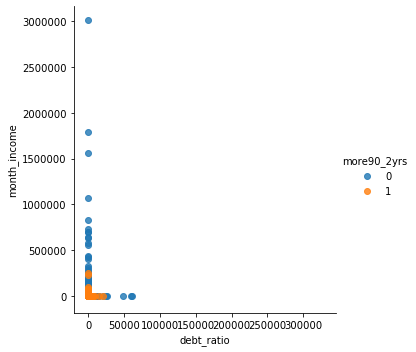

In [50]:
sns.lmplot(data = train, x = 'debt_ratio', y = 'month_income', hue = 'more90_2yrs', fit_reg = False)

In [62]:
lower_income_debt = train[(train['month_income']<60000) & (train['debt_ratio']<4000)]

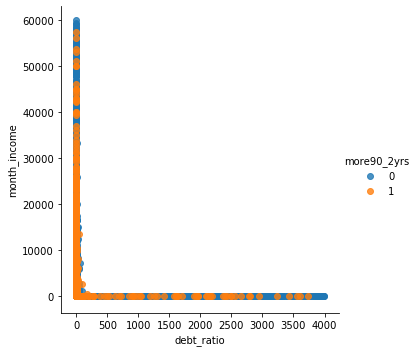

In [63]:
sns.lmplot(data = lower_income_debt, x = 'debt_ratio', y = 'month_income', hue = 'more90_2yrs', fit_reg = False)

# month_income, num_90late

In [ ]:
# 과거 90일 이상 연체 횟수 낮을수록 연체 가능성 높음

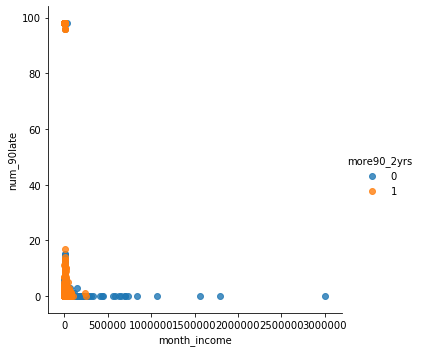

In [70]:
sns.lmplot(data = train, x = 'month_income', y = 'num_90late', hue = 'more90_2yrs', fit_reg = False)
plt.show();

In [77]:
low_income_late = train[(train['num_90late'] < 20) & (train['month_income'] < 150000)]

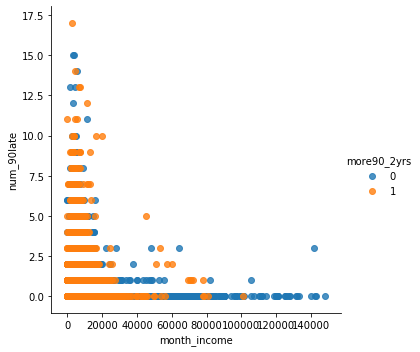

In [78]:
sns.lmplot(data = low_income_late, x = 'month_income', y = 'num_90late', hue = 'more90_2yrs', fit_reg = False)

In [ ]:
# 

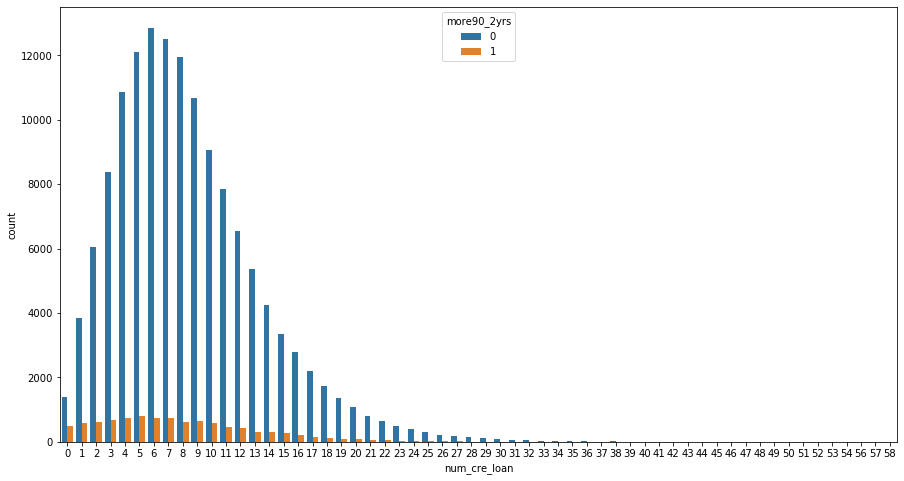

In [79]:
plt.figure(figsize=(15,8))
ax = sns.countplot(data = train, x = 'num_cre_loan', hue = 'more90_2yrs')

In [80]:
train.isna().sum()

more90_2yrs           0
rev_util              0
age                   0
num_30-59_due         0
debt_ratio            0
month_income      29731
num_cre_loan          0
num_90late            0
num_REL               0
num_60-89_due         0
num_dependents     3924
dtype: int64

In [85]:
train.fillna(0, inplace = True)

In [86]:
train.isna().sum()

more90_2yrs       0
rev_util          0
age               0
num_30-59_due     0
debt_ratio        0
month_income      0
num_cre_loan      0
num_90late        0
num_REL           0
num_60-89_due     0
num_dependents    0
dtype: int64

In [88]:
from sklearn.model_selection import train_test_split

In [104]:
X = train.drop(columns = ['more90_2yrs'])
y = train['more90_2yrs']
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [105]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((112500, 10), (37500, 10), (112500,), (37500,))

In [109]:
from sklearn.tree import DecisionTreeClassifier

tree_clf = DecisionTreeClassifier(max_depth = 5)
tree_clf.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [110]:
from sklearn.metrics import classification_report, roc_auc_score
pred_train = tree_clf.predict(X_train)
pred_test = tree_clf.predict(X_test)

In [111]:
print(classification_report(y_train, pred_train))
print(classification_report(y_test, pred_test))

              precision    recall  f1-score   support

           0       0.94      0.99      0.97    104917
           1       0.59      0.19      0.29      7583

    accuracy                           0.94    112500
   macro avg       0.77      0.59      0.63    112500
weighted avg       0.92      0.94      0.92    112500

              precision    recall  f1-score   support

           0       0.95      0.99      0.97     35057
           1       0.55      0.19      0.28      2443

    accuracy                           0.94     37500
   macro avg       0.75      0.59      0.62     37500
weighted avg       0.92      0.94      0.92     37500



In [115]:
from sklearn.metrics import confusion_matrix, recall_score, precision_score, f1_score, accuracy_score

In [116]:
confusion_matrix(y_train, pred_train)

array([[103917,   1000],
       [  6125,   1458]], dtype=int64)

In [117]:
confusion_matrix(y_test, pred_test)

array([[34679,   378],
       [ 1979,   464]], dtype=int64)

In [118]:
accuracy_score(y_test, pred_test)

0.9371466666666667

In [119]:
recall_score(y_test, pred_test)

0.18993041342611544

In [120]:
def print_metrics(y, pred, title=None):
    acc = accuracy_score(y, pred)
    recall = recall_score(y, pred)
    precision = precision_score(y, pred)
    f1 = f1_score(y, pred)
    if title:
        print(title)
    print(f'정확도:{acc}, 재현률:{recall}, 정밀도:{precision}, f1점수:{f1}')

In [121]:
print_metrics(y_test, pred_test)

정확도:0.9371466666666667, 재현률:0.18993041342611544, 정밀도:0.5510688836104513, f1점수:0.28249619482496197


In [122]:
tree = DecisionTreeClassifier()
tree.fit(X_train, y_train)
pred_tree = tree.predict(X_test)
print_metrics(y_test, pred_tree, '결정나무 - test')

결정나무 - test
정확도:0.8983733333333334, 재현률:0.29308227589029884, 정밀도:0.2557142857142857, f1점수:0.2731260728590502


In [124]:
from sklearn.ensemble import RandomForestClassifier

In [125]:
rf = RandomForestClassifier(n_estimators=200)
rf.fit(X_train, y_train)
pred_rf = rf.predict(X_test)
print_metrics(y_test, pred_rf, 'RF - test')

RF - test
정확도:0.9362666666666667, 재현률:0.19238641015145314, 정밀도:0.5298759864712514, f1점수:0.2822822822822823


In [126]:
pred_proba_rf = rf.predict_proba(X_test)

In [128]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score

In [129]:
positive_prova = pred_proba_rf

In [ ]:
fprs, tprs, th = 